In [61]:
import zipfile

zipf = zipfile.ZipFile('/opt/final-project-level3-cv-05/sample_data.zip')
zipf.extractall('/opt/final-project-level3-cv-05/image')
zipf.close()

In [62]:
import json

with open('/opt/final-project-level3-cv-05/image/info.json','r') as f:
    json_data = json.load(f)

### image & annotation 시각화 

In [63]:
anns=[]

for data in json_data.get("annotations")[3].get("ocr").get("word"):
    anns.append(data.get('points'))

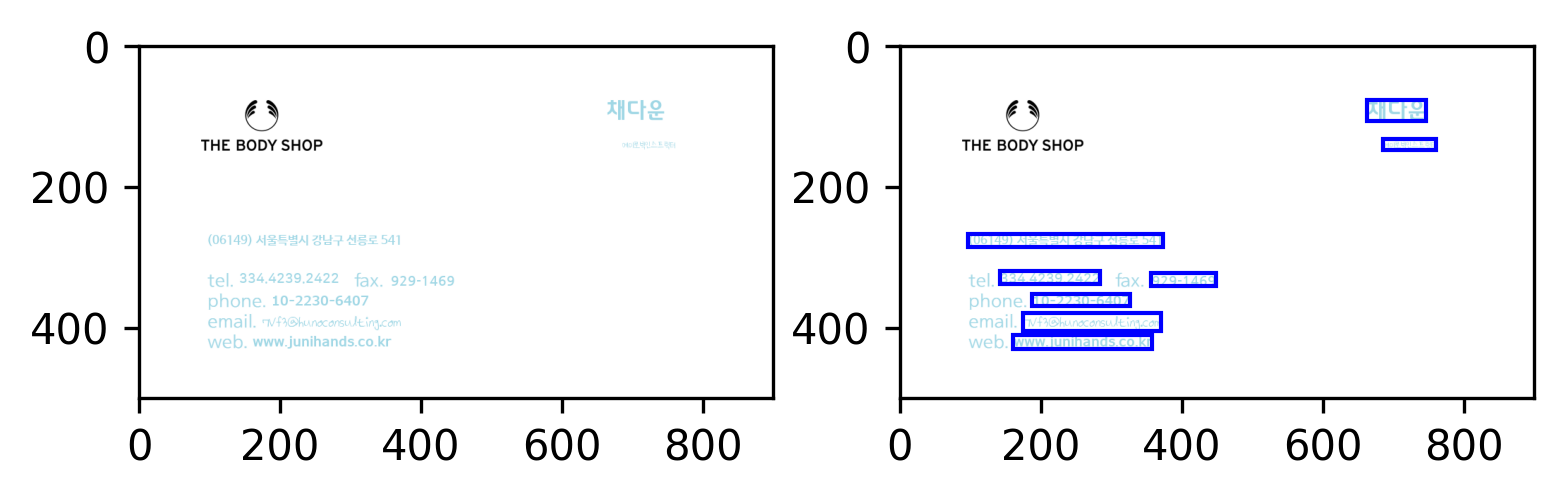

In [64]:
import skimage.io as io
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1, 2, dpi=300)
img = io.imread('/opt/final-project-level3-cv-05/image/images/0003.png')

ax[0].imshow(img)
ax[1].imshow(img)

for i in range(len(anns)):
   points = np.array(anns[i])
   ax[1].add_patch(
      patches.Polygon(
               points,
               closed=True,
               edgecolor='blue',
               fill=False,
               ), 
   )

In [65]:
# 전화번호 Rule Function 작성 -> 구현 실패 
def phone_check(x):
    if (r'\d{2}-\d(4)-\d(4)'):
        return 1
    else:
        return 0 

In [66]:
# 전화번호 Rule Library 존재 -> 활용방법 논의필요
import phonenumbers
from phonenumbers import carrier
from phonenumbers.phonenumberutil import number_type

print(carrier._is_mobile(number_type(phonenumbers.parse('010 2013 3626', "KR"))))
print(carrier._is_mobile(number_type(phonenumbers.parse('+8201020133626', "KR"))))
print(carrier._is_mobile(number_type(phonenumbers.parse('010-2013-3626', "KR"))))

True
True
True


### Feature Generate Function

In [67]:
def email_check(x):
    if ('@' in x) and ('.' in x):
        return True
    else:
        return False

In [68]:
def site_check(x):
    if ('www' in x) or ('.co.' in x):
        return True
    else:
        return False

In [69]:
address_si=['서울','부산','대구','인천','광주','대전','울산','세종','경기','강원','충청북도','충북','충청남도','충북','전라북도','전북','전라남도','전남','경상북도','경북','경상남도','경남','제주']
address_gu_lst=['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구',
'금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구','중구','서구','동구','영도구','부산진구','동래구','남구','북구','해운대구','사하구',
'금정구','강서구','연제구','수영구','사상구','기장군','중구','동구','서구','남구','북구','수성구','달서구','달성군','중구','동구','연수구','남동구','부평구',
'계양구','서구','미추홀구','강화군','옹진군','동구','서구','남구','북구','광산구','동구','중구','서구','유성구','대덕구','중구','남구','동구','북구','울주군',
'세종시','수원시','장안구','권선구','팔달구','영통구','성남시','수정구','중원구','분당구','의정부시','안양시','만안구','동안구','부천시','광명시','평택시',
'동두천시','안산시','상록구','단원구','고양시','덕양구','일산동구','일산서구','과천시','구리시','남양주시','오산시','시흥시','군포시','의왕시','하남시',
'용인시','처인구','기흥구','수지구','파주시','이천시','안성시','김포시','화성시','광주시','양주시','포천시','여주시','연천군','가평군','양평군','춘천시',
'원주시','강릉시','동해시','태백시','속초시','삼척시','홍천군','횡성군','영월군','평창군','정선군','철원군','화천군','양구군','인제군','고성군','양양군',
'충주시','제천시','청주시','상당구','서원구','흥덕구','청원구','보은군','옥천군','영동군','진천군','괴산군','음성군','단양군','증평군','천안시','동남구',
'서북구','공주시','보령시','아산시','서산시','논산시','계룡시','당진시','금산군','부여군','서천군','청양군','홍성군','예산군','태안군','전주시','완산구',
'덕진구','군산시','익산시','정읍시','남원시','김제시','완주군','진안군','무주군','장수군','임실군','순창군','고창군','부안군','목포시','여수시','순천시',
'나주시','광양시','담양군','곡성군','구례군','고흥군','보성군','화순군','장흥군','강진군','해남군','영암군','무안군','함평군','영광군','장성군','완도군',
'진도군','신안군','포항시','남구','북구','경주시','김천시','안동시','구미시','영주시','영천시','상주시','문경시','경산시','군위군','의성군','청송군','영양군',
'영덕군','청도군','고령군','성주군','칠곡군','예천군','봉화군','울진군','울릉군','진주시','통영시','사천시','김해시','밀양시','거제시','양산시','창원시','의창구',
'성산구','마산합포구','마산회원구','진해구','의령군','함안군','창녕군','고성군','남해군','하동군','산청군','함양군','거창군','합천군','제주시','서귀포시']
address_gu=list(set(address_gu_lst))

In [70]:
def check_address_si(x,elem):
    if elem in x:
        return True
    else:
        return False

def check_address_gu(x,elem):
    if elem in x:
        return True
    else: 
        return False

def address_check(x):
    for elem in address_si:
        if check_address_si(x,elem):
            break
        else:
            return False
    for elem in address_gu:
        if check_address_gu(x,elem):
            break
        else:
            return False

    return True

In [71]:
def rulebase_label(x):
    if email_check(x):
        return 3
    elif address_check(x):
        return 7
    elif site_check(x):
        return 8
    else:
        return None
    

In [72]:
def kr_or_eng_check(x):
    if x.isalnum() :
        return 1
    else:
        return 0

def onlykr_check(x):
    for chr in x:
        if ord('가') <= ord(chr) <= ord('힣'):
            continue
        else:
            return 0
    return 1

def onlydigit_check(x):
    if x.isdigit() :
        return 1
    else:
        return 0

def krdigit_check(x):
    for chr in x:
        if onlykr_check(chr) or onlydigit_check(chr):
            continue
        else:
            return 0
    return 1 


### Feature Engineering Main Function

In [73]:
import re

image_id=[]
label=[]

kr_or_eng, onlykr, onlydigit, onlyeng, krdigit = [], [], [], [], []  # onlyeng는 구현 X 
widthList, heightList, ratioList, areaList = [], [], [], []

annotationsArray=json_data.get("annotations")

for idx, annos in enumerate(annotationsArray):
    wordArray=annos.get("ocr").get("word")

    for id, words in enumerate(wordArray):
        image_id.append(idx)

        ### text Rule-Base ###
        # email & address & site 
        txt=words.get("text")
        label.append(rulebase_label(txt))

        ### text feature engineering ###
        wrd = re.sub('\W+','', txt) # 언어, 숫자, _ 만 남도록 하는 정규표현식 
        kr_or_eng.append(kr_or_eng_check(wrd))
        onlykr.append(onlykr_check(wrd))
        onlydigit.append(onlydigit_check(wrd))
        krdigit.append(krdigit_check(wrd))

        ### points feature engineering ###
        p1, p2, p3, p4 = map(list, words.get("points"))

        width = max(abs(p2[0]-p1[0]),abs(p3[0]-p4[0]))  # 가로길이
        height = max(abs(p2[1]-p3[1]),abs(p1[1]-p4[1]))  # 세로길이 
        widthList.append(width)    
        heightList.append(height) 

        ratioList.append(width / height)  # 가로 세로 비율
        areaList.append(width * height)  # BBOX 넓이


In [74]:
import pandas as pd 
feature_df=pd.DataFrame(list(zip(image_id, label, kr_or_eng, onlykr, onlydigit, krdigit, widthList, heightList, ratioList, areaList)), columns=['image_id','pred_label', 'kr_or_eng', 'onlykr', 'onlydigit', 'krdigit', 'width', 'height', 'ratio', 'area'])
feature_df

,image_id,pred_label,kr_or_eng,onlykr,onlydigit,krdigit,width,height,ratio,area
0,0,NaN,1,1,0,1,172.0,46.0,3.739130,7912.0
1,0,NaN,1,1,0,1,36.0,20.0,1.800000,720.0
2,0,NaN,1,1,0,1,78.0,27.0,2.888889,2106.0
3,0,NaN,1,0,1,1,142.0,24.0,5.916667,3408.0
4,0,3.0,1,0,0,0,106.0,19.0,5.578947,2014.0
...,...,...,...,...,...,...,...,...,...,...
8124,999,NaN,1,1,0,1,75.0,26.0,2.884615,1950.0
8125,999,NaN,1,0,1,1,130.0,18.0,7.222222,2340.0
8126,999,3.0,1,0,0,0,266.0,23.0,11.565217,6118.0
8127,999,8.0,1,0,0,0,190.0,24.0,7.916667,4560.0
